<a href="https://colab.research.google.com/github/Akansh-Verma/Plant-Disease-Detection-Application/blob/main/new_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing all the requirements**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os

### **New Section**

In [3]:
train_path='/content/drive/MyDrive/project_new/train'
print(os.listdir(train_path))
print("*"*100)
valid_path='/content/drive/MyDrive/project_new/valid'
print(os.listdir(valid_path))

['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold']
****************************************************************************************************
['Tomato___healthy', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite']


In [4]:
folder=(os.listdir(train_path))
folder

['Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Septoria_leaf_spot',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Early_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Target_Spot',
 'Tomato___Leaf_Mold']

## Representing the Tomatos
ty : being the type of disease

index : being the image in the data sets.

Text(0.5, 1.0, '/content/drive/MyDrive/project_new/train/Tomato___healthy')

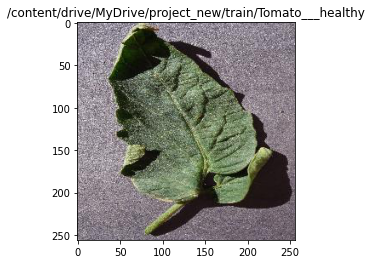

In [5]:
index=2
import matplotlib.pyplot as plt
folder_name = 'Tomato___healthy'
folder_path = os.path.join(train_path, folder_name)
img_path = os.path.join(folder_path, os.listdir(folder_path)[index])
image = plt.imread(img_path)
plt.imshow(image)
plt.title(folder_path)


## Importing packages

In [6]:
from tensorflow.keras.layers import Lambda, Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [7]:
size=[128,128]
vgg19=VGG19(input_shape=size+[3],weights='imagenet',include_top=False)

80134624/80134624 [==============================] - 3s 0us/step


## Freezing the rest of the layers

In [8]:
for layer in vgg19.layers:
    layer.trainable=False

# Creating the top layer for my desired prediction

In [9]:
x=Flatten()(vgg19.output)
prediction=Dense(len(folder),activation='softmax')(x)

model_vgg=Model(inputs=vgg19.input,outputs=prediction)

### **Model Summary**

In [10]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

### **Compiling the model**

In [11]:
plateau = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=7, 
            verbose=0,
            mode='min')

In [12]:
model_vgg.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### **Data Augmentation**

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
train_set=train_datagen.flow_from_directory(train_path,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=True)
valid_set=valid_datagen.flow_from_directory(valid_path,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=False)

Found 18365 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [15]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

history=model_vgg.fit(train_set,
                validation_data=valid_set,
                epochs=9,
                callbacks=[tb_callback]
                )

Epoch 1/9
1148/1148 [==============================] - 7833s 7s/step - loss: 0.7658 - accuracy: 0.7431 - val_loss: 0.5744 - val_accuracy: 0.8065
Epoch 2/9
1148/1148 [==============================] - 92s 80ms/step - loss: 0.4379 - accuracy: 0.8485 - val_loss: 0.6204 - val_accuracy: 0.7939
Epoch 3/9
1148/1148 [==============================] - 89s 77ms/step - loss: 0.3389 - accuracy: 0.8837 - val_loss: 0.4792 - val_accuracy: 0.8388
Epoch 4/9
1148/1148 [==============================] - 88s 76ms/step - loss: 0.2844 - accuracy: 0.9010 - val_loss: 0.4315 - val_accuracy: 0.8497
Epoch 5/9
1148/1148 [==============================] - 84s 73ms/step - loss: 0.2246 - accuracy: 0.9238 - val_loss: 0.4145 - val_accuracy: 0.8600
Epoch 6/9
1148/1148 [==============================] - 82s 71ms/step - loss: 0.2072 - accuracy: 0.9280 - val_loss: 0.4368 - val_accuracy: 0.8582
Epoch 7/9
1148/1148 [==============================] - 84s 73ms/step - loss: 0.1683 - accuracy: 0.9438 - val_loss: 0.4527 - val_ac

### **Visualizing the Fitting of the model**

Text(0.5, 1.0, 'Training and validation loss')

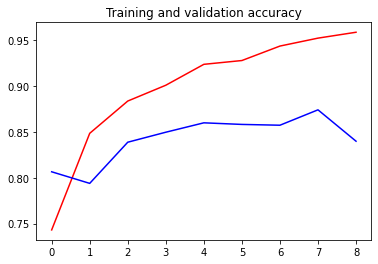

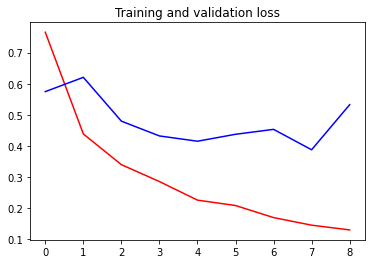

In [16]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', )
plt.plot(epochs, val_acc, 'b', )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', )
plt.plot(epochs, val_loss, 'b', )


plt.title('Training and validation loss')

In [17]:
# Scores is just a list containing loss and accuracy value
scores=model_vgg.evaluate(train_set)
scores2=model_vgg.evaluate(valid_set)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

287/287 [==============================] - 17s 57ms/step - loss: 0.5323 - accuracy: 0.8399
Training Loss is :0.18640540540218353
Training Accuracy is :93.47672462463379 %
Testing Loss is : 0.5322606563568115
Testing Accuracy is : 83.99127721786499 %


### **Predicting the model**
%Load_ext tensorboard

%tensorboard --Logdir Logs/fit

In [ ]:
y_pred=model_vgg.predict(valid_set)

### **saving the model**

In [ ]:
model_vgg.save('model_vgg19.h5')

### **Checking the prediction of the model**

In [20]:
import cv2
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
    img_array=img_array/255
    new_array=cv2.resize(img_array,(128,128))
    return new_array.reshape(-1,128,128,3)

In [ ]:
class_dict=train_set.class_indices
class_dict

In [22]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction)==clss:
            return key

Tomato___Leaf_Mold
1/1 [==============================] - 1s 670ms/step


'Tomato___healthy'

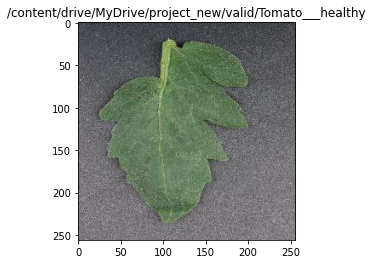

In [23]:
import matplotlib.pyplot as plt
ty = 9
index = 2
folder_name = 'Tomato___healthy'
folder_path = os.path.join(valid_path, folder_name)
img_path = os.path.join(folder_path, os.listdir(folder_path)[index])
image = plt.imread(img_path)
print(folder[ty])
plt.imshow(image)
plt.title(folder_path)
pred=model_vgg.predict([prepare(img_path)])
prediction_cls(pred)